<a href="https://colab.research.google.com/github/farhin-chy/ML-Assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8687 - loss: 0.4499 - val_accuracy: 0.9598 - val_loss: 0.1440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9635 - loss: 0.1266 - val_accuracy: 0.9681 - val_loss: 0.1101
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9759 - loss: 0.0814 - val_accuracy: 0.9747 - val_loss: 0.0850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0615 - val_accuracy: 0.9738 - val_loss: 0.0854
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.9754 - val_loss: 0.0774
313/313 - 1s - 2ms/step - accuracy: 0.9754 - loss: 0.0774

✅ Test accuracy: 0.9754


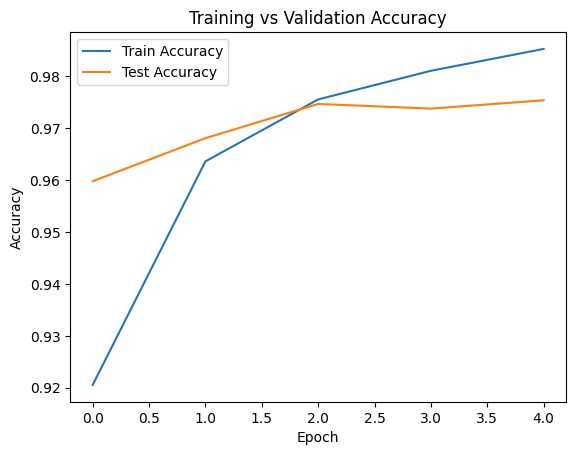

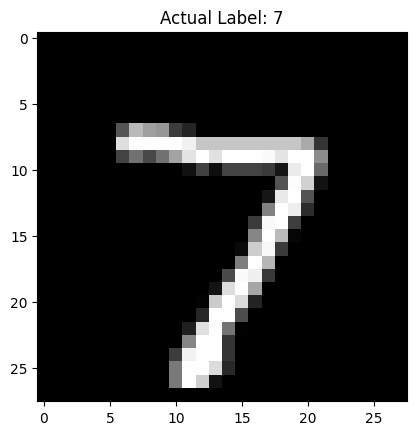

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Label: 7


In [ ]:
# Assignment 1: Recognize a Digit using Machine Learning (TensorFlow)
# Author: Your Name
# Date: YYYY-MM-DD
#
# Description:
# This program uses the MNIST dataset to train a neural network that recognizes handwritten digits (0-9).
# The implementation is done using TensorFlow and Keras in Google Colab.

# ------------------------
# 1️⃣ Import libraries
# ------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# ------------------------
# 2️⃣ Load the MNIST dataset
# ------------------------
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize the pixel values (0–255 → 0–1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# ------------------------
# 3️⃣ Build the neural network model
# ------------------------
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Flatten image to 1D
    layers.Dense(128, activation='relu'),     # Hidden layer
    layers.Dense(10, activation='softmax')    # Output layer (10 digits)
])

# ------------------------
# 4️⃣ Compile the model
# ------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ------------------------
# 5️⃣ Train the model
# ------------------------
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ------------------------
# 6️⃣ Evaluate the model
# ------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

# ------------------------
# 7️⃣ Plot training history
# ------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# ------------------------
# 8️⃣ Make a prediction
# ------------------------
import numpy as np

# Pick one test image
index = 0
img = x_test[index]
plt.imshow(img, cmap='gray')
plt.title("Actual Label: " + str(y_test[index]))
plt.show()

# Predict
prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicted Label:", np.argmax(prediction))